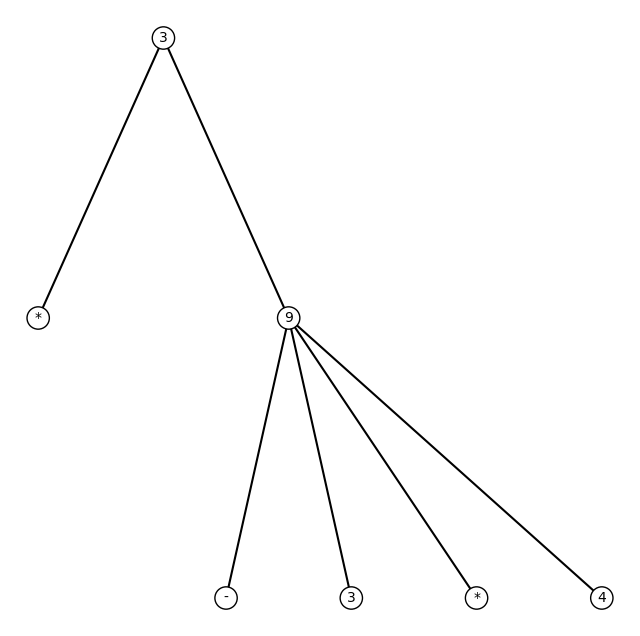

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import re

class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child):
        self.children.append(child)

def create_expression_tree(expression):
    stack = []
    root = None
    for token in re.findall(r'[()]|\d+|\S+', expression):
        if token == '(':
            stack.append(root)
            root = None
        elif token == ')':
            if stack:
                parent = stack.pop()
                parent.add_child(root)
                root = parent
        else:
            node = Node(token)
            if root:
                root.add_child(node)
            else:
                root = node
    return root

def draw_tree(node, pos=None, ax=None, level=0, y_off=0, y_gap=1.0, x=0):
    if pos is None:
        pos = {}
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    if node not in pos:
        pos[node] = (x, level)
    x, y = pos[node]
    ax.text(x, -y, node.value, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'))
    if node.children:
        child_y = y - y_gap
        for idx, child in enumerate(node.children):
            child_x = x - 2**(5-level) + idx * 2**(6-level)
            pos[child] = (child_x, child_y)
            ax.plot([x, child_x], [-y, -child_y], 'k-')
            draw_tree(child, pos, ax, level + 1, y_off, y_gap, child_x)
    return ax



expression = "3 * (9 - 3 * 4)"
root = create_expression_tree(expression)
pos = {}
draw_tree(root, pos)

plt.gca().invert_yaxis()
plt.axis('off')
plt.show()